In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# -*- coding: utf-8 -*-
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
path = '/content/drive/My Drive/Hackathon TCESP'
os.chdir(path)

In [0]:
dataset = pd.read_excel('/content/drive/My Drive/Hackathon TCESP/base_treinamento_teste.xlsx')

In [5]:
dataset.head()

,municipios,porte,exercicio,M05Q01100,M05Q01310,M05Q01600,M05Q01700,M05Q01800,M05Q01900,M05Q02000,M05Q02100,ptotal60,ptotal6465,resp
0,Adamantina,M,2017,1,95.0,1,1,1,1,1,1,1.000000,1.0,-0.25
1,Adolfo,PP,2017,1,100.0,1,1,1,1,1,0,0.666667,1.0,-1.00
2,Aguaí,M,2017,1,100.0,0,1,1,0,1,0,0.666667,0.5,-0.25
3,Águas da Prata,P,2017,1,100.0,0,0,0,0,1,0,0.666667,0.0,0.00
4,Águas de Lindóia,P,2017,1,100.0,0,0,0,0,1,0,0.666667,0.0,1.00


In [0]:
X = dataset.iloc[:,range(3,11)]
y = dataset.iloc[:,-1]

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [0]:
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.001, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)


In [10]:
clf

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.001, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1343


In [0]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

Text(0, 0.5, 'Deviance')

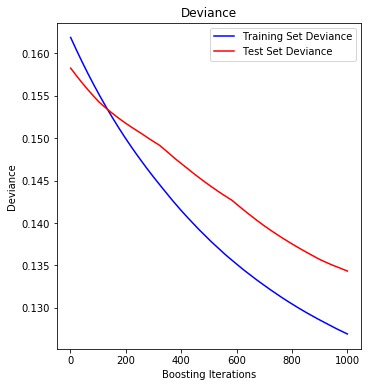

In [13]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

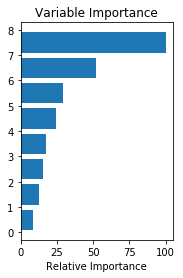

In [14]:

feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

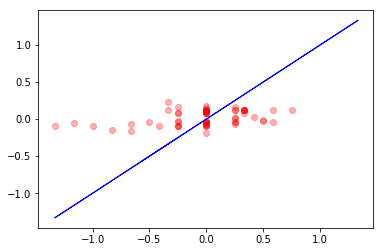

In [15]:
plt.scatter(y_test, y_pred, color='red', alpha = 0.3,linewidth=1)
plt.plot(y, y, color='blue', linewidth=1)
plt.show()

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
print('erro absoluto real vs. previsão: ', (mean_absolute_error(y_test, y_pred)))
print('erro quadrado real vs. previsão: ', (mean_squared_error(y_test, y_pred)))
print('escore r2 real vs. previsão: ', (r2_score(y_test, y_pred)))

erro absoluto real vs. previsão:  0.26998649117143736
erro quadrado real vs. previsão:  0.13433503886239795
escore r2 real vs. previsão:  0.11754515803011456


In [22]:
params = {'n_estimators': 10000, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.001, 'loss': 'ls'}

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 0.1343


In [0]:
from numpy import loadtxt
import pickle
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [0]:
pickle.dump(clf, open("/content/drive/My Drive/Hackathon TCESP/escoragem.pickle.dat", "wb"))